<a href="https://colab.research.google.com/github/Thalma8/data-analysis/blob/main/Titani_Spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement - Spaceship Titanic

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

The task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help make these predictions, a set of personal records are recovered from the ship's damaged computer system.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# Reading the Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic Spaceship_Classification Problem/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic Spaceship_Classification Problem/test.csv')

# Exploratory Data Analysis

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.columns

# Data Field Descriptions
- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- **Destination** - The planet the passenger will be debarking to.

- **Age** - The age of the passenger.

- **VIP** - Whether the passenger has paid for special VIP service during the voyage.

- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- **Name** - The first and last names of the passenger.

- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
# profiling data with pandas
profile = ProfileReport(train)
profile.to_notebook_iframe()

In [ ]:
train.info() # Columns and Data types for train data set

In [ ]:
test.info() # Columns and Data types for test data set

In [ ]:
train.isna().mean() * 100 #Checking null values

In [ ]:
# Check if there any missing values in train set using a bar chart
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
# Check if there any missing values in train set using a bar graph
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
train.columns

In [ ]:
# Splitting the columns into categorical and numerical types
cat_cols = ['HomePlanet', 'CryoSleep','Destination', 'VIP']
num_cols = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
corr = train.corr()
corr

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

**Plotting the Categorical Features**

In [ ]:

for cat in cat_cols:
    sns.countplot(x=cat, data=train)
    plt.title(cat.capitalize())
    plt.show()

## Observations:

- Most people were from planet earth

- Most people were going to Trappist-1e

- Lesss people were on cyrosleep while the majority of the passengers were not

- Few people were in VIP


**Plotting Numerical columns**

In [ ]:
for num in num_cols:
    sns.displot(train[num])
    plt.title(num.capitalize() + 'Distribution')
    plt.show()

In [ ]:
train.describe(include = "O") # getting a consodiated analysis of the categorical columns

In [ ]:
train.describe() # getting a consodiated analysis of the numerical columns

- The minimum age is 0. Is 0 age representing babies that haven't reaches 1 year?
- Most People actually didn't spend on the Luxury Amenities

In [ ]:
train.corr()

In [ ]:
sns.boxplot(x='Age', data=train)

In [ ]:
sns.countplot(x='Transported', data=train) #Checking the target variable

Observations:

- Classification problem

- Column is balanced, very rare in real life-situations

**Bivariate and Multivariate Analysis**

In [ ]:
# plotting the categorical features with hue='Transported'
for cat in cat_cols:
    sns.countplot(x=cat, data=train, hue='Transported')
    plt.title(cat.capitalize() + '- Transported')
    plt.show()

Observations

- Many People from Europa were transported
- Many People who were in CrysoSleep were transported

The other Categorical Features have averagely balanced Transported count.

In [ ]:
# checking the age distribution across the categorical features
for cat in cat_cols:
    sns.boxplot(x=cat, data=train, y='Age')
    plt.show()

**Observations**
- Most people in VIP were older
- People from Earth were younger

In [ ]:
#Comparing the passengers homeplanets to the destination they were travelling to
sns.countplot(x='HomePlanet', data=train, hue='Destination') 

In [ ]:
train.groupby(['HomePlanet', 'Destination']).count()

**Observations**

- For each planet, there were more people were going to Trappist-ie

In [ ]:
# checking people that were in VIP according HomePlanet and Destination 
for planet in ['HomePlanet', 'Destination']:
    sns.countplot(x=planet, data=train, hue='VIP')
    plt.show()

In [ ]:
# checking the actual number of people in VIP from HomePlanet
train.groupby(['HomePlanet', 'VIP']).count()

- **No one from Earth was in VIP**

In [ ]:
# Checking the CryoSleep column with VIP
sns.countplot(x='CryoSleep', data=train, hue='VIP')

In [ ]:
train.groupby(['CryoSleep', 'VIP']).count()

**Observation: Less people in cyrosleep in VIP that those who were not.**

In [ ]:
# checking people in CryoSleep from the HomePlanet and Destination
for planet in ['HomePlanet', 'Destination']:
    sns.countplot(x=planet, data=train, hue='CryoSleep')
    plt.show()

Did people in CryoSleep spend any amount in the luxury amenities?

In [ ]:
train[train['CryoSleep'] == True].describe()

**Observations**

If put on CryoSleep, then you cannot spend anything

**Checking the spending habits for people in VIP and not in VIP**

In [ ]:
train.groupby('VIP').describe()

In [ ]:
# plot for amount spent by people in VIP
for luxury in num_cols[1:]:
    sns.boxplot(x='VIP', y=luxury, data=train)
    plt.show()

**Observation:**

Most people in VIP spent money in VRDeck, Food Court and Spa

## Feature Extraction

**Recall**
- **PassengerID**. 
Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

Extracting the group number

In [ ]:
train.head()

In [ ]:
train['GroupNo'] = train['PassengerId'].apply(lambda x: x.split('_')[0])

In [ ]:
test['GroupNo'] = test['PassengerId'].apply(lambda x: x.split('_')[0])

In [ ]:
train

In [ ]:
test.head()

In [ ]:
train.groupby(['GroupNo', 'HomePlanet']).count()

In [ ]:
train.groupby('GroupNo').count().sort_values(by='PassengerId', ascending=False)

- **People travelling in the same group have the same Cabin No and are from the same HomePlanet**

In [ ]:
train[train['Cabin'].isna()] # Checking missing values for the cabin column

**Combining the Datasets for easy Preprocessing**

In [ ]:
# Getting the last index of training data
ntrain = train.shape[0]

# Combining the 2 Dataframes
all_data = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
all_data.shape

In [ ]:
all_data

**Extracting Features from the Cabin Feature**

In [ ]:
all_data['Cabin'] = all_data['Cabin'].apply(str)

In [ ]:
# extracting the Cabin_Deck from the Cabin
all_data['Cabin_Deck'] = all_data['Cabin'].apply(lambda x: x.split('/')[0])

# extracting the Cabin_Side from the Cabin
all_data['Cabin_Side'] = all_data['Cabin'].apply(lambda x: x.split('/')[-1])

In [ ]:
# replacing the str 'nan' with null value
for cabin in ['Cabin', 'Cabin_Deck', 'Cabin_Side']:
    all_data[cabin] = all_data[cabin].apply(lambda x: np.nan if x == 'nan' else x)

In [ ]:
all_data.head(5)

In [ ]:
all_data.info()

**EDA on the Cabin columns**

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.countplot(x=cabin, data=all_data)
    plt.show()

In [ ]:
all_data['Cabin_Deck'].value_counts()

In [ ]:
all_data['Cabin_Side'].value_counts()

In [ ]:
train['Cabin'] = train['Cabin'].apply(str)

# extracting features from the Cabin of the train dataframe
train['Cabin_Deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_Side'] = train['Cabin'].apply(lambda x: x.split('/')[-1])

# replacing the str 'nan' with np.nan
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    train[cabin] = train[cabin].apply(lambda x: np.nan if x == 'nan' else x)

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.countplot(x=cabin, data=train, hue='Transported')
    plt.show()

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.countplot(x=cabin, data=train, hue='HomePlanet')
    plt.show()

In [ ]:
train.groupby(['Cabin_Deck', 'HomePlanet']).count()

- Cabin_Deck G only contained people from Earth
- Cabin_Deck A,B C and T were people from Europa
- Deck D had no people from Earth
- Deck F had no people from Europa

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.countplot(x=cabin, data=train, hue='Destination')
    plt.show()

In [ ]:
train.groupby(['Cabin_Deck', 'Destination']).count()

- People in Deck T were travelling to TRAPPIST-1e

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.countplot(x=cabin, data=train, hue='CryoSleep')
    plt.show()

In [ ]:
train.groupby(['Cabin_Deck', 'CryoSleep']).count()

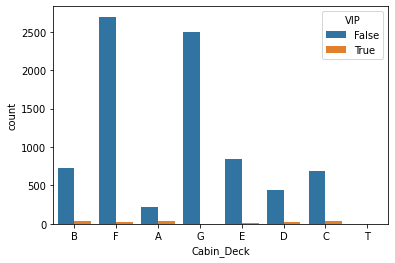

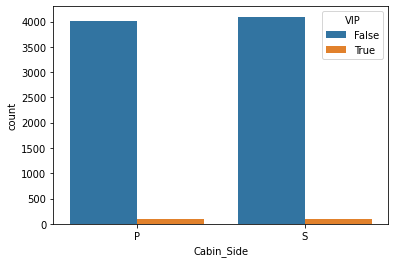

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.countplot(x=cabin, data=train, hue='VIP')
    plt.show()

In [ ]:
train.groupby(['Cabin_Deck', 'VIP']).count()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  \
Cabin_Deck VIP                                                             
A          False          215         211        209    215          211   
           True            35          35         35     35           35   
B          False          725         712        707    725          709   
           True            42          42         41     42           41   
C          False          687         674        666    687          676   
           True            41          41         39     41           40   
D          False          438         430        428    438          428   
           True            31          29         31     31           31   
E          False          846         823        826    846          823   
           True            15          15         15     15           15   
F          False         2695        2630       2630   2695         2630   
           True            29          26         29     29           29   
G          False         2493        2433       2434   2493         2450   
T          False            5           4          4      5            5   

                   Age  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  \
Cabin_Deck VIP                                                               
A          False   206          211        214           211   215     211   
           True     35           34         35            33    35      34   
B          False   712          712        712           705   708     714   
           True     42           42         42            42    42      41   
C          False   669          676        668           670   672     674   
           True     41           41         39            40    39      41   
D          False   428          428        430           429   425     427   
           True     31           30         30            30    31      31   
E          False   826          831        832           829   827     833   
           True     15           14         15            15    15      15   
F          False  2653         2635       2634          2638  2633    2628   
           True     28           29         26            28    29      27   
G          False  2436         2436       2441          2421  2442    2433   
T          False     5            5          5             4     5       5   

                  Name  Transported  GroupNo  Cabin_Side  
Cabin_Deck VIP                                            
A          False   209          215      215         215  
           True     34           35       35          35  
B          False   709          725      725         725  
           True     42           42       42          42  
C          False   674          687      687         687  
           True     40           41       41          41  
D          False   428          438      438         438  
           True     31           31       31          31  
E          False   827          846      846         846  
           True     15           15       15          15  
F          False  2623         2695     2695        2695  
           True     28           29       29          29  
G          False  2436         2493     2493        2493  
T          False     4            5        5           5

- People in Deck G(Earth people) were not in VIP

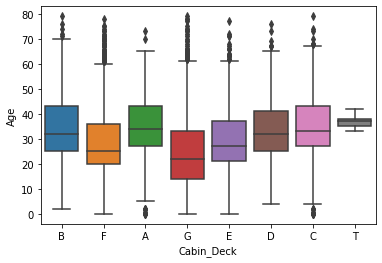

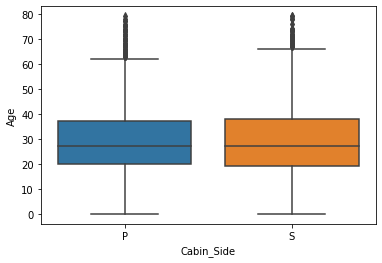

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.boxplot(x=cabin, y='Age', data=train)
    plt.show()

In [ ]:
train.groupby('Cabin_Deck')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Cabin_Deck,,,,,,,,
A,247.0,35.161943,13.554395,0.0,27.0,34.0,43.0,73.0
B,766.0,33.622715,13.265808,2.0,25.0,32.0,43.0,79.0
C,729.0,34.886145,13.143416,0.0,27.0,33.0,43.0,79.0
D,467.0,33.518201,12.497089,4.0,25.0,32.0,41.0,76.0
E,856.0,30.068925,12.660891,0.0,21.0,27.0,37.0,77.0
F,2748.0,28.430495,13.577425,0.0,20.0,25.0,36.0,78.0
G,2501.0,24.062775,15.500982,0.0,14.0,22.0,33.0,79.0
T,5.0,37.000000,3.391165,33.0,35.0,37.0,38.0,42.0


- Deck G had the youngest people with median age of 22

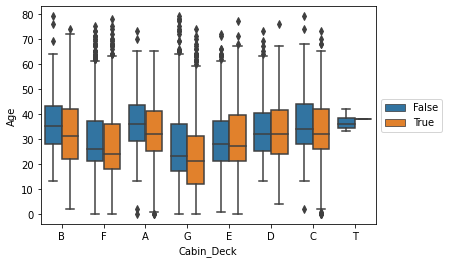

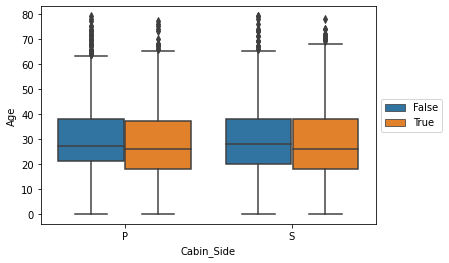

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.boxplot(x=cabin, y='Age', data=train, hue='Transported')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

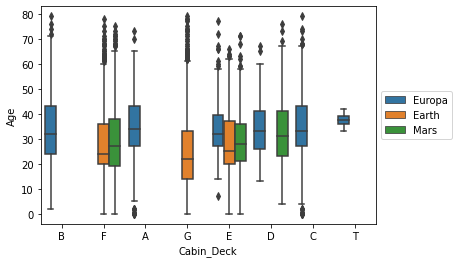

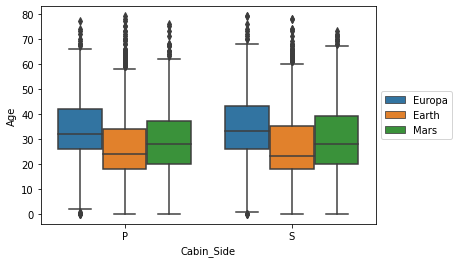

In [ ]:
for cabin in ['Cabin_Deck', 'Cabin_Side']:
    sns.boxplot(x=cabin, y='Age', data=train, hue='HomePlanet')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

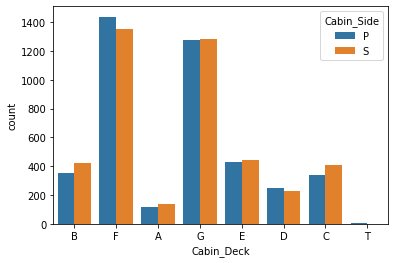

In [ ]:
sns.countplot(x='Cabin_Deck', data=train, hue='Cabin_Side')

# Data Cleaning

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  GroupNo       12970 non-null  object 
 15  Cabin_Deck    12671 non-null  object 
 16  Cabin_Side    12671 non-null  object 
dtypes: float64(6), object(11)
memory usage: 1.7+ MB


In [ ]:
all_data.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
GroupNo            0
Cabin_Deck       299
Cabin_Side       299
dtype: int64

In [ ]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNo,Cabin_Deck,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,S


In [ ]:
all_data.groupby(['GroupNo', 'Cabin_Deck']).count()

,,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Side
GroupNo,Cabin_Deck,,,,,,,,,,,,,,,
0001,B,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0002,F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0003,A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
0004,F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0005,F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276,A,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9277,G,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
9278,G,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
all_data.groupby('GroupNo')['Cabin_Deck'].agg(pd.Series.mode)

GroupNo
0001    B
0002    F
0003    A
0004    F
0005    F
       ..
9276    A
9277    G
9278    G
9279    G
9280    E
Name: Cabin_Deck, Length: 9280, dtype: object

In [ ]:
# filling null Cabin_Deck Values according to the GroupNo
all_data['Cabin_Deck'] = all_data['Cabin_Deck'].fillna(
    all_data['GroupNo'].map(
        all_data.groupby('GroupNo')['Cabin_Deck'].agg(pd.Series.mode)))

In [ ]:
# removing the empty values that were filled
all_data['Cabin_Deck'] = all_data['Cabin_Deck'].apply(lambda x: x if len(x) == 1 else np.nan)

# checking the unique items
all_data['Cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [ ]:
all_data['Cabin_Deck'].isna().sum()

166

Cabin_Deck null values have reduced from 299 to 166

In [ ]:
all_data.groupby(['GroupNo', 'Cabin_Side']).count()

,,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck
GroupNo,Cabin_Side,,,,,,,,,,,,,,,
0001,P,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0002,S,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0003,S,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
0004,S,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0005,P,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276,P,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9277,S,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
9278,S,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
all_data.groupby('GroupNo')['Cabin_Side'].agg(pd.Series.mode)

GroupNo
0001    P
0002    S
0003    S
0004    S
0005    P
       ..
9276    P
9277    S
9278    S
9279    S
9280    S
Name: Cabin_Side, Length: 9280, dtype: object

In [ ]:
# filling null Cabin_Side values according to the GroupNo
all_data['Cabin_Side'] = all_data['Cabin_Side'].fillna(all_data['GroupNo'].map(
    all_data.groupby('GroupNo')['Cabin_Side'].agg(pd.Series.mode)))

In [ ]:
# removing the empty values that were filled
all_data['Cabin_Side'] = all_data['Cabin_Side'].apply(lambda x: x if len(x) == 1 else np.nan)

# checking the unique items
all_data['Cabin_Side'].unique()

array(['P', 'S', nan], dtype=object)

In [ ]:
all_data['Cabin_Side'].isna().sum()

162

Null Cabin_Side values have reduced from 299 to 162

**Starting with HomePlanet**

From the EDA it was noted that:
- Cabin_Deck G only contained people from Earth
- Cabin_Deck A,B C and T were people from Europa
- Deck D had no people from Earth
- Deck F had no people from Europa

In [ ]:
all_data.groupby('Cabin_Deck')['HomePlanet'].agg(pd.Series.mode)

Cabin_Deck
A    Europa
B    Europa
C    Europa
D      Mars
E     Earth
F     Earth
G     Earth
T    Europa
Name: HomePlanet, dtype: object

In [ ]:
# filling null HomePlanet values according to the mode of the Cabin_Deck
all_data['HomePlanet'] = all_data['HomePlanet'].fillna(all_data['Cabin_Deck'].map(
    all_data.groupby('Cabin_Deck')['HomePlanet'].agg(pd.Series.mode)))

# checking the unique values of HomePlanet
all_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
all_data['HomePlanet'].isna().sum()

5

Null HomePlanet values have reduced from 288 to 5

In [ ]:
# filling the rest null values with the mode
all_data['HomePlanet'] = all_data['HomePlanet'].fillna('Earth')

# checking the null values
all_data['HomePlanet'].isna().sum()

0

**Filling the CryoSleep null values**

If a person didnt spend anything, we'll assume he is on CryoSleep

In [ ]:
def fill_cryo(col):
    cryo = col[0]
    amenities = col[1:]
    
    if pd.isnull(cryo):
        
        if set(amenities) == {0}:
            return True
    else:
        return cryo
    

In [ ]:
all_data['CryoSleep'] = all_data[['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(
    fill_cryo, axis=1)

# checking the null values
all_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        187
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
GroupNo            0
Cabin_Deck       166
Cabin_Side       162
dtype: int64

Null CryoSleep values have reduced from 310 to 187

In [ ]:
# Filling the remaining null values with the mode
all_data['CryoSleep'] = all_data['CryoSleep'].fillna(False)

# checking the null values
all_data['CryoSleep'].isna().sum()

0

**Filling VIP null values with False**

In [ ]:
all_data['VIP'] = all_data['VIP'].fillna(False)

all_data['VIP'].isna().sum()

0

**Filling Null Cabin_Deck and Cabin_Side Columns**

In [ ]:
all_data.groupby('HomePlanet')['Cabin_Deck'].agg(pd.Series.mode)

HomePlanet
Earth     G
Europa    B
Mars      F
Name: Cabin_Deck, dtype: object

In [ ]:
all_data.groupby(['HomePlanet', 'Cabin_Deck']).count()

PassengerId  CryoSleep  Cabin  Destination   Age   VIP  \
HomePlanet Cabin_Deck                                                           
Earth      E                   621        621    618          601   613   621   
           F                  2539       2539   2526         2486  2503  2539   
           G                  3821       3821   3781         3745  3737  3821   
Europa     A                   361        361    354          356   351   361   
           B                  1161       1161   1141         1138  1137  1161   
           C                  1122       1122   1102         1101  1098  1122   
           D                   299        299    296          297   292   299   
           E                   198        198    197          192   195   198   
           T                    11         11     11           11    11    11   
Mars       D                   431        431    424          418   423   431   
           E                   514        514    508          505   498   514   
           F                  1726       1726   1713         1682  1681  1726   

                       RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  \
HomePlanet Cabin_Deck                                                       
Earth      E                   602        613           606   605     609   
           F                  2484       2477          2489  2484    2485   
           G                  3736       3732          3716  3737    3731   
Europa     A                   354        359           351   358     354   
           B                  1140       1139          1132  1137    1142   
           C                  1104       1091          1093  1093    1103   
           D                   294        293           293   288     290   
           E                   196        194           192   194     197   
           T                    11         11            10    11      11   
Mars       D                   422        420           424   421     423   
           E                   504        499           506   505     505   
           F                  1696       1692          1689  1688    1687   

                       Name  Transported  GroupNo  Cabin_Side  
HomePlanet Cabin_Deck                                          
Earth      E            607          420      621         621  
           F           2482         1691     2539        2539  
           G           3725         2588     3821        3821  
Europa     A            353          262      361         361  
           B           1137          796     1161        1161  
           C           1104          761     1122        1122  
           D            290          189      299         299  
           E            193          129      198         198  
           T             10            5       11          11  
Mars       D            423          298      431         431  
           E            507          335      514         514  
           F           1680         1117     1726        1726

Filling null Cabin_Deck values according to the HomePlanet

In [ ]:
all_data['Cabin_Deck'] = all_data['Cabin_Deck'].fillna(
    all_data['HomePlanet'].map(all_data.groupby('HomePlanet')['Cabin_Deck'].agg(pd.Series.mode)))

# checking the null values
all_data['Cabin_Deck'].isna().sum()

0

In [ ]:
all_data.groupby(['Cabin_Side', 'Cabin_Deck']).count()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  \
Cabin_Side Cabin_Deck                                                           
P          A                   172         172        172    166          169   
           B                   519         519        519    512          507   
           C                   542         542        542    533          526   
           D                   375         375        375    370          369   
           E                   642         642        642    641          630   
           F                  2189        2189       2189   2178         2144   
           G                  1910        1910       1910   1885         1870   
           T                     5           5          5      5            5   
S          A                   189         189        189    188          187   
           B                   642         642        642    629          631   
           C                   580         580        580    569          575   
           D                   355         355        355    350          346   
           E                   691         691        691    682          668   
           F                  2076        2076       2076   2061         2024   
           G                  1915        1915       1915   1896         1879   
           T                     6           6          6      6            6   

                        Age   VIP  RoomService  FoodCourt  ShoppingMall   Spa  \
Cabin_Side Cabin_Deck                                                           
P          A            166   172          169        171           168   171   
           B            511   519          509        511           504   513   
           C            528   542          532        524           527   529   
           D            366   375          369        367           366   367   
           E            628   642          628        627           629   629   
           F           2146  2189         2139       2144          2144  2137   
           G           1870  1910         1860       1872          1853  1873   
           T              5     5            5          5             5     5   
S          A            185   189          185        188           183   187   
           B            626   642          631        628           628   624   
           C            570   580          572        567           566   564   
           D            349   355          347        346           351   342   
           E            678   691          674        679           675   675   
           F           2038  2076         2041       2025          2034  2035   
           G           1871  1915         1879       1864          1867  1868   
           T              6     6            6          6             5     6   

                       VRDeck  Name  Transported  GroupNo  
Cabin_Side Cabin_Deck                                      
P          A              168   168          122      172  
           B              508   507          359      519  
           C              533   533          347      542  
           D              365   362          253      375  
           E              631   629          429      642  
           F             2141  2139         1442     2189  
           G             1875  1865         1295     1910  
           T                5     4            4        5  
S          A              186   185          140      189  
           B              634   630          437      642  
           C              570   571          414      580  
           D              348   351          234      355  
           E              680   678          455      691  
           F             2031  2023         1366     2076  
           G             1860  1864         1296     1915  
           T                6     6            1        6

In [ ]:
all_data['Cabin_Side'].value_counts()

S    6454
P    6354
Name: Cabin_Side, dtype: int64

**Assumption:**
- The Cabin_Side(Port and Starboard) should be balanced

Filling the null values in a way that the Port and Starboard will be balanced

In [ ]:
def fill_side(cols):
    cabin_deck = cols[0]
    cabin_side = cols[1]
    
    if pd.isnull(cabin_side):
        
        if cabin_deck in ['A', 'B', 'C', 'D', 'E', 'G']:
            return 'P'
        else:
            return 'S'
    else:
        return cabin_side

In [ ]:
all_data['Cabin_Side'] = all_data[['Cabin_Deck', 'Cabin_Side']].apply(fill_side, axis=1)

# checking the null values
all_data['Cabin_Side'].isna().sum()

0

In [ ]:
all_data['Cabin_Side'].value_counts()

P    6485
S    6485
Name: Cabin_Side, dtype: int64

- The Cabin_Side is perfectly balanced

**Cleaning Destination**

There was no clear connection from the EDA that could help fill the Destination
- The mode will be used for filling the null values

In [ ]:
all_data['Destination'].agg('mode')[0]

'TRAPPIST-1e'

In [ ]:
all_data['Destination'] = all_data['Destination'].fillna(all_data['Destination'].agg('mode')[0])

# checking the null values
all_data['Destination'].isna().sum()

0

**Age Cleaning**

We'll use the median ages from the Cabin_Deck column to fill the missing values of Age

In [ ]:
train.groupby('Cabin_Deck')['Age'].agg('median')

Cabin_Deck
A    34.0
B    32.0
C    33.0
D    32.0
E    27.0
F    25.0
G    22.0
T    37.0
Name: Age, dtype: float64

In [ ]:
all_data['Age'] = all_data['Age'].fillna(all_data['Cabin_Deck'].map(train.groupby('Cabin_Deck')['Age'].agg('median')))

# checking the null values
all_data['Age'].isna().sum()

0

**Cleaning the Luxury ammenities columns with 0**

In [ ]:
all_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
GroupNo            0
Cabin_Deck         0
Cabin_Side         0
dtype: int64

In [ ]:
all_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'GroupNo', 'Cabin_Deck', 'Cabin_Side'],
      dtype='object')

In [ ]:
for luxury in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    all_data[luxury] = all_data[luxury].fillna(0)
    
# checking the null values
all_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
GroupNo            0
Cabin_Deck         0
Cabin_Side         0
dtype: int64

**Grabbing the Relevant columns**


In [ ]:
model_data = all_data.drop(['PassengerId', 'Cabin', 'Name', 'GroupNo'], axis=1)

In [ ]:
model_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


**Splitting back to train and test dataset**

In [ ]:
train_cleaned = model_data[:ntrain]
test_cleaned = model_data[ntrain:].reset_index(drop=True).drop('Transported', axis=1)

In [ ]:
train_cleaned.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [ ]:
test_cleaned.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S


**Encoding the Categorical Features**

In [ ]:
# splitting into independent and dependent features
X = train_cleaned.drop('Transported', axis=1)
y = train_cleaned['Transported']

# using one hot encoding on the categorical columns
X = pd.get_dummies(X, drop_first=True) # encoding the training data
test_cleaned = pd.get_dummies(test_cleaned, drop_first=True) # encoding the test data

In [ ]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,0,0,1,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
dict_map = {True: 1,
           False: 0}

In [ ]:
# encoding CryoSleep and VIP
for column in ['CryoSleep', 'VIP']:
    X[column] = X[column].map(dict_map)
    test_cleaned[column] = test_cleaned[column].map(dict_map)

In [ ]:
X.head(2)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
test_cleaned.head(2)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


# MACHINE LEARNING

In [ ]:
y = y.map(dict_map)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S
8064,0,47.0,0,187.0,268.0,977.0,3441.0,236.0,1,0,0,1,0,0,0,1,0,0,0,1
3669,0,60.0,1,2739.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0,0,0
3689,1,20.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0
4180,1,29.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
257,1,14.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,44.0,0,103.0,0.0,18.0,1197.0,1.0,0,0,0,1,0,0,0,0,1,0,0,0
5695,0,8.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0
8006,1,19.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1
1361,0,20.0,0,0.0,258.0,331.0,133.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rfc_pred))
print()
print(classification_report(y_test, rfc_pred))

[[1057  242]
 [ 301 1008]]

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1299
           1       0.81      0.77      0.79      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



**Checking the Feature Importance of RandomForestClassifier**

In [ ]:
rfc.feature_importances_

array([1.02466659e-01, 1.83110160e-01, 2.68440177e-03, 1.17462599e-01,
       1.05291092e-01, 9.23410185e-02, 1.23639979e-01, 1.11891722e-01,
       2.72341907e-02, 1.73955852e-02, 9.71589794e-03, 1.51335420e-02,
       7.50746368e-03, 6.99130197e-03, 4.76906932e-03, 1.42347450e-02,
       1.65187920e-02, 1.99351606e-02, 2.59584112e-05, 2.16506628e-02])

In [ ]:
# Creating a dataframe of the feature importances
feat_importance_df = pd.DataFrame(index=X.columns, data=rfc.feature_importances_, columns=['Importances'])

feat_importance_df

,Importances
CryoSleep,0.102467
Age,0.183110
VIP,0.002684
RoomService,0.117463
FoodCourt,0.105291
ShoppingMall,0.092341
Spa,0.123640
VRDeck,0.111892
HomePlanet_Europa,0.027234
HomePlanet_Mars,0.017396


In [ ]:
# Sorting the importances in descending order
feat_importance_df.sort_values('Importances', ascending=False)

,Importances
Age,0.183110
Spa,0.123640
RoomService,0.117463
VRDeck,0.111892
FoodCourt,0.105291
CryoSleep,0.102467
ShoppingMall,0.092341
HomePlanet_Europa,0.027234
Cabin_Side_S,0.021651
Cabin_Deck_G,0.019935


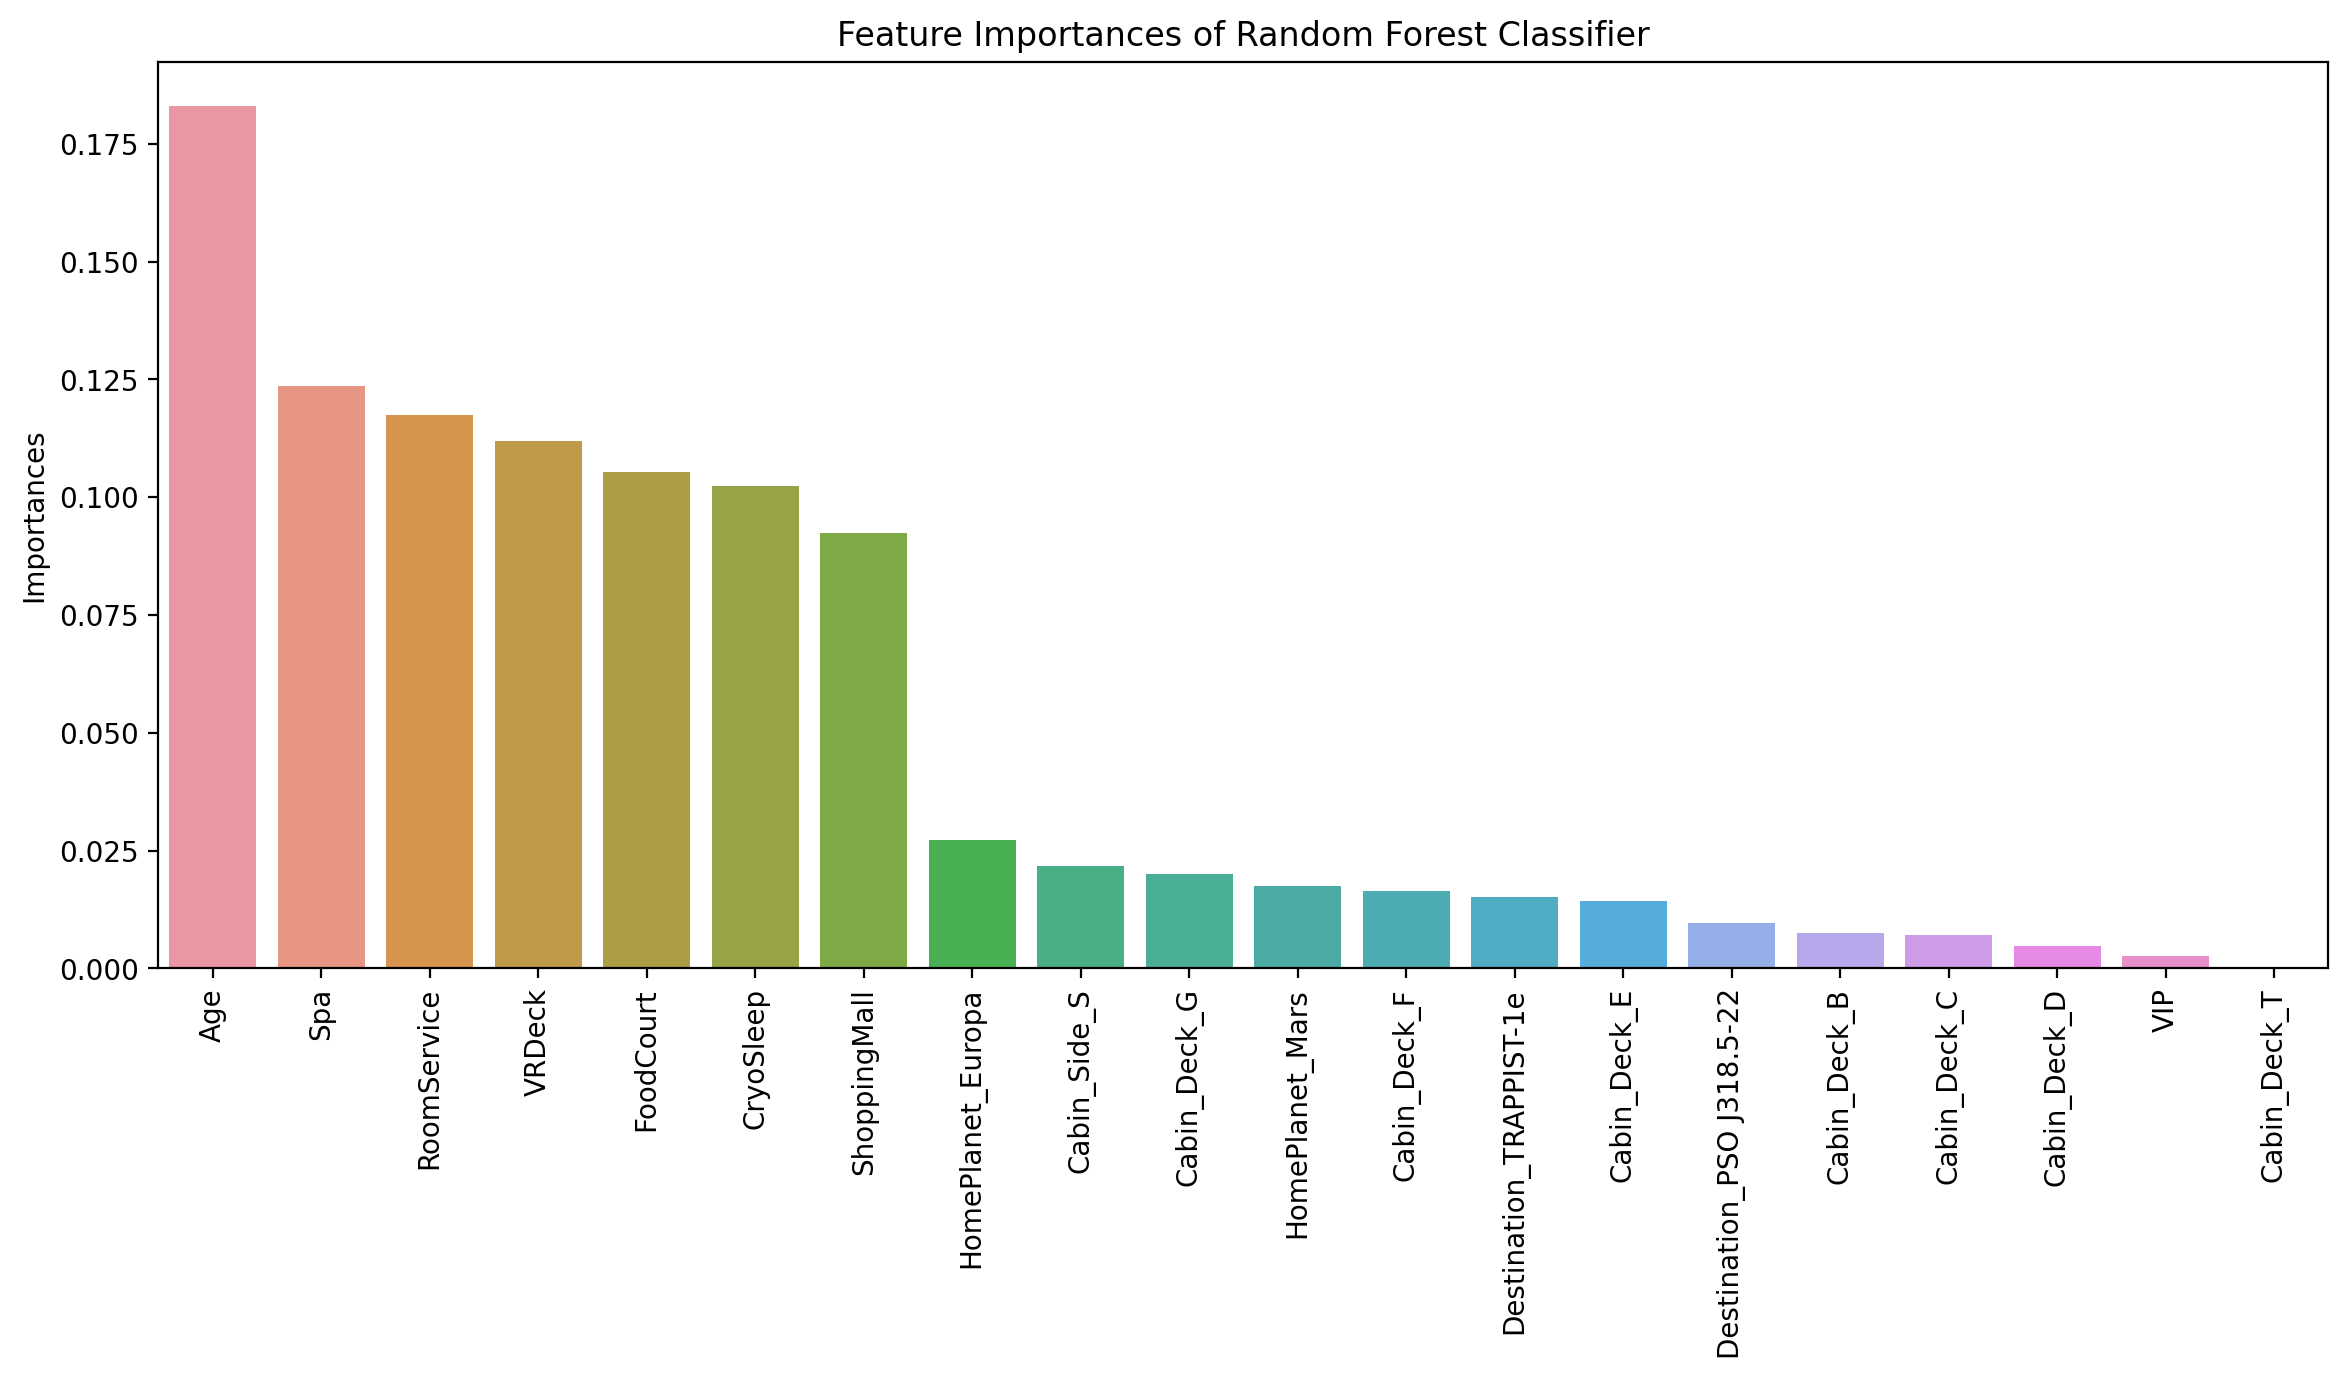

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x=feat_importance_df.sort_values('Importances', ascending=False).index, 
            data=feat_importance_df.sort_values('Importances', ascending=False), 
            y='Importances')
plt.title('Feature Importances of Random Forest Classifier')
plt.xticks(rotation=90);

# XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier().fit(X_train, y_train)

In [ ]:
xg_pred = xg.predict(X_test)

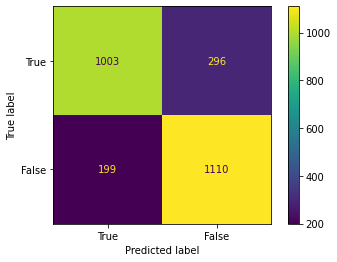

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, xg_pred), display_labels=['True', 'False']).plot()

In [ ]:
print(confusion_matrix(y_test, xg_pred))
print()
print(classification_report(y_test, xg_pred))

[[1003  296]
 [ 199 1110]]

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1299
           1       0.79      0.85      0.82      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



**Checking the Feauture Importances of XGBOOST**

In [ ]:
xg.feature_importances_

array([0.5851895 , 0.01562105, 0.        , 0.03922303, 0.02332302,
       0.01723329, 0.03580603, 0.03012458, 0.06403478, 0.01566637,
       0.00650937, 0.00854407, 0.00815535, 0.0108105 , 0.        ,
       0.0256332 , 0.02174817, 0.07821394, 0.        , 0.01416376],
      dtype=float32)

In [ ]:
xg_feat_importance = pd.DataFrame(index=X.columns, data=xg.feature_importances_, columns=['Importances'])

xg_feat_importance

,Importances
CryoSleep,0.585190
Age,0.015621
VIP,0.000000
RoomService,0.039223
FoodCourt,0.023323
ShoppingMall,0.017233
Spa,0.035806
VRDeck,0.030125
HomePlanet_Europa,0.064035
HomePlanet_Mars,0.015666


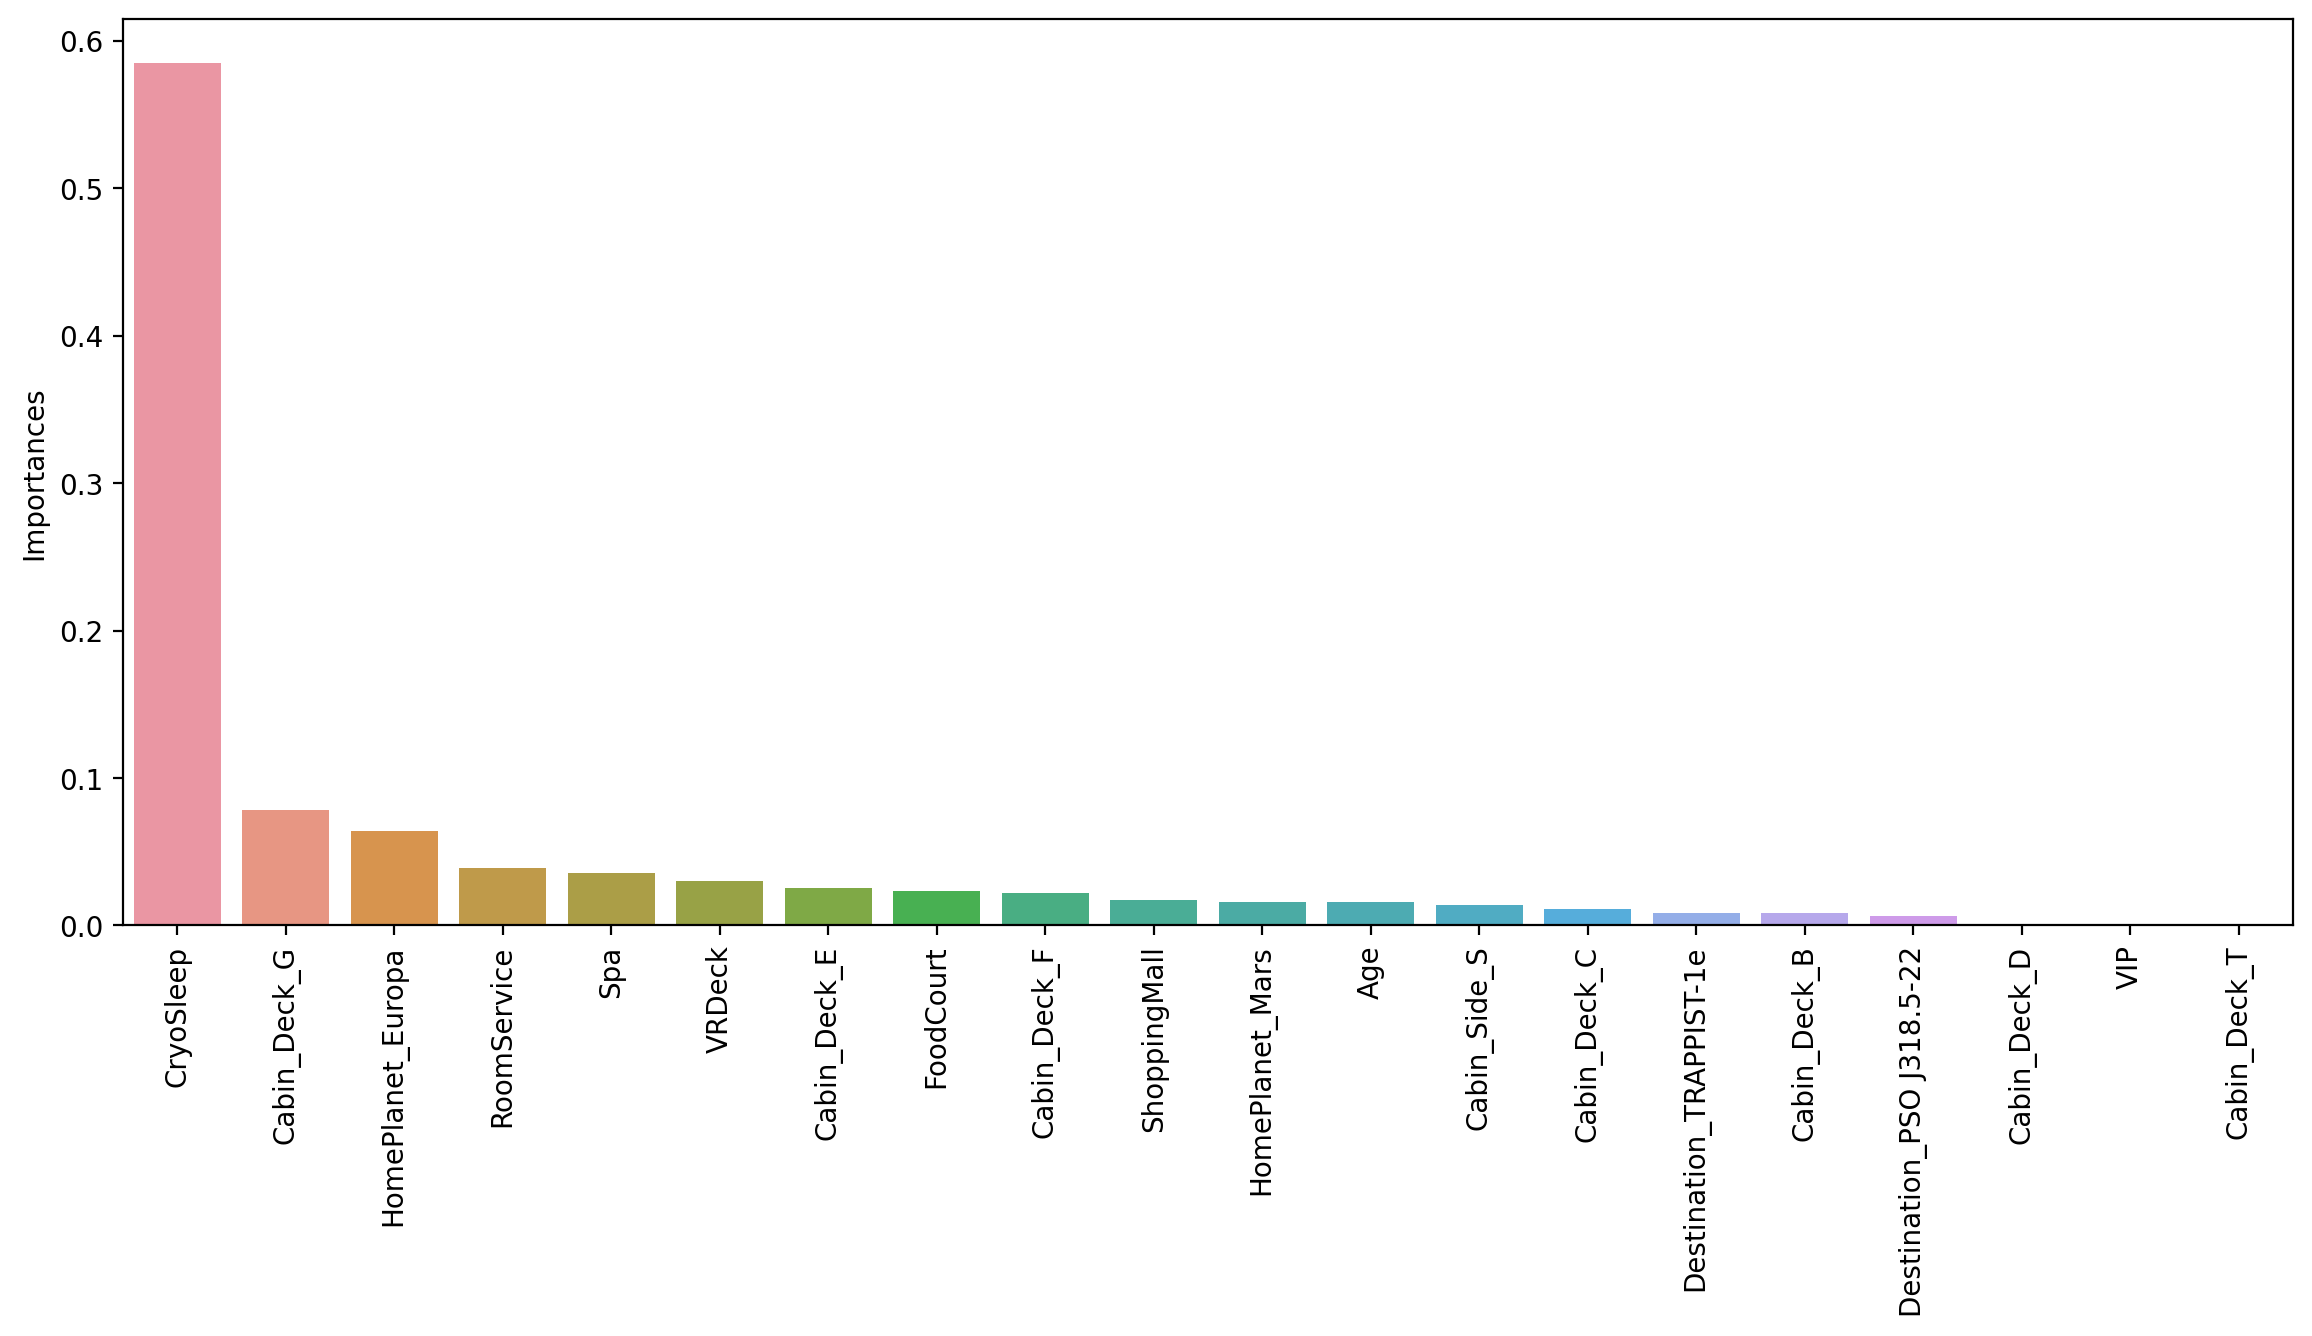

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x=xg_feat_importance.sort_values('Importances', ascending=False).index,
           y = 'Importances',
           data = xg_feat_importance.sort_values('Importances', ascending=False))
plt.xticks(rotation=90);

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [ ]:
log_pred = log.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, log_pred))
print()
print(classification_report(y_test, log_pred))

[[1004  295]
 [ 238 1071]]

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1299
           1       0.78      0.82      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, dtree_pred))
print()
print(classification_report(y_test, dtree_pred))

[[938 361]
 [316 993]]

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1299
           1       0.73      0.76      0.75      1309

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608



**Making Predictions**

In [ ]:
ss = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic Spaceship_Classification Problem/sample_submission.csv')

In [ ]:
rfc_ss = ss.copy()

In [ ]:
rfc_ss

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
rfc_test_pred = rfc.predict(test_cleaned)

In [ ]:
map_target = {0: False,
             1: True}

In [ ]:
rfc_ss['Transported'] = rfc_test_pred

In [ ]:
rfc_ss['Transported'] = rfc_ss['Transported'].map(map_target)

In [ ]:
rfc_ss

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
rfc_ss.to_csv('RandomForestBaseline.csv', index=False)

In [ ]:
pd.read_csv('RandomForestBaseline.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
